<a href="https://colab.research.google.com/github/kkb0318/benkyokai/blob/main/LIME_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考：https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb

In [13]:
!pip install lime

     |████████████████████████████████| 276kB 5.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=91941ee41b5a0469252eaca0c3867b7d279d85a6b67fc1029fa780bea45d3da4
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [1]:

import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.5.0


In [2]:
inet_model = inc_net.InceptionV3()

96124928/96112376 [==============================] - 2s 0us/step


In [7]:
import pprint
import time
import urllib.error
import urllib.request

def download_file(url, dst_path):
    try:
        with urllib.request.urlopen(url) as web_file:
            data = web_file.read()
            with open(dst_path, mode='wb') as local_file:
                local_file.write(data)
    except urllib.error.URLError as e:
        print(e)

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

49152/35363 [=========================================] - 0s 0us/step
('n02133161', 'American_black_bear', 0.6371588)
('n02105056', 'groenendael', 0.031818103)
('n02104365', 'schipperke', 0.029944424)
('n01883070', 'wombat', 0.02850953)
('n01877812', 'wallaby', 0.025093628)


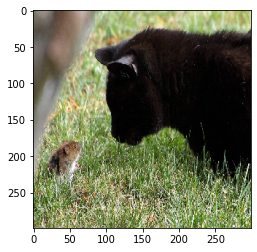

In [11]:
url = "https://github.com/marcotcr/lime/blob/master/doc/notebooks/data/cat_mouse.jpg?raw=true"
path = "cat_mouse.jpg"
data = download_file(url,path)

images = transform_img_fn([path])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [14]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:

explainer = lime_image.LimeImageExplainer()

In [16]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)


CPU times: user 6min 42s, sys: 6.09 s, total: 6min 48s
Wall time: 3min 37s


In [17]:
from skimage.segmentation import mark_boundaries

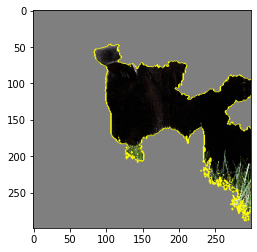

In [18]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))